# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*) 

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded. 


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1 
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [3]:
df = pd.read_csv('tmdb_5000_movies TMDL 2024.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

*Columns: 
2 homepage, this means there is no URL to the website.
7 overview, has 3 null values, these could be added by hand, or removed
11 release_date, since in this column there is only 1 null value, we might remove it
13 runtime, only 2 null, so might do the same as with 11
16 tagline, containing the tagline for the movie.

Both 2 and 16 have enough missing values that plainly deleting it might be unjustified. But since both of them contain non-numerical values, (both objects are text and the first is a url) it does not make sense to estimate them. 


### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [7]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [8]:
df = df.dropna(subset=["overview"]).reset_index(drop=True)

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [9]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    if label in unique_labels:
        out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row['proc_genres'], unique_genres))

# Add one-hot encoded genres to dataframe
df["one_hot_genres"] = encoded_labels

100%|██████████| 4800/4800 [00:00<00:00, 21211.30it/s]


Verify that one-hot encodings are indeed as expected

In [10]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

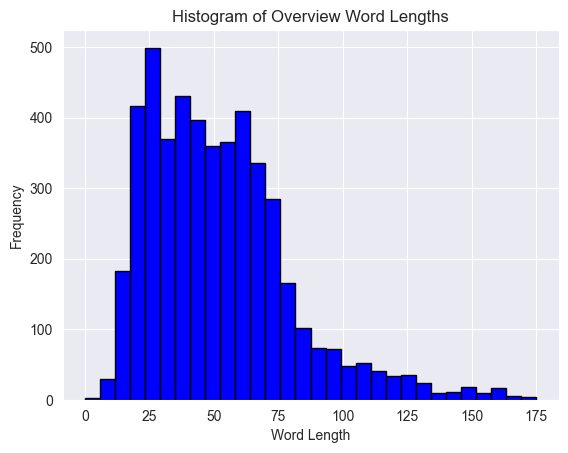

In [11]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# Loop over df, remove punctuation, make words lowercase, and add it to a new column
for index, row in df.iterrows():
    overview = row['overview']
    processed_overview = remove_punctuation(overview).lower()
    processed_overviews.append(processed_overview)

df["proc_overview"] = processed_overviews

# Get the word lengths of each overview and store it in a list
overview_lens = [len(overview.split()) for overview in processed_overviews]

# For the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens

# Plot a histogram of the word lengths
plt.hist(overview_lens, bins=30, color='blue', edgecolor='black')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of Overview Word Lengths')
plt.grid(True)
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

I would choose the mean, which seems to be around 50 

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [13]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= token_len]


# split each proc_overview into a list of words, select the first token_len words, 
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: ' '.join(x.split()[:token_len]))


# print to verify
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [15]:
# hint: store all words for all movies in a set, change it to a list and sort
all_words = set()

for overview in df["proc_overview"]:
    words = overview.split()
    all_words.update(words)
    
words_list = sorted(list(all_words))

vocab_len = len(words_list)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [17]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = []  # Set of encodings for this overview
    for word in row["proc_overview"].split():
        # Get encoding for this word
        word_encode = encode_labels(word, words_list)
        sentence_encode.append(word_encode)
    # Sum over axis=0 to form histogram
    sentence_encode = np.sum(sentence_encode, axis=0)
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels

# Print to verify
print(df['one_hot_overview'])

100%|██████████| 4707/4707 [00:16<00:00, 287.00it/s]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

this will be vocab_len * 16 * 4707 = 12493 * 16 * 4707 = 940872816 bytes

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

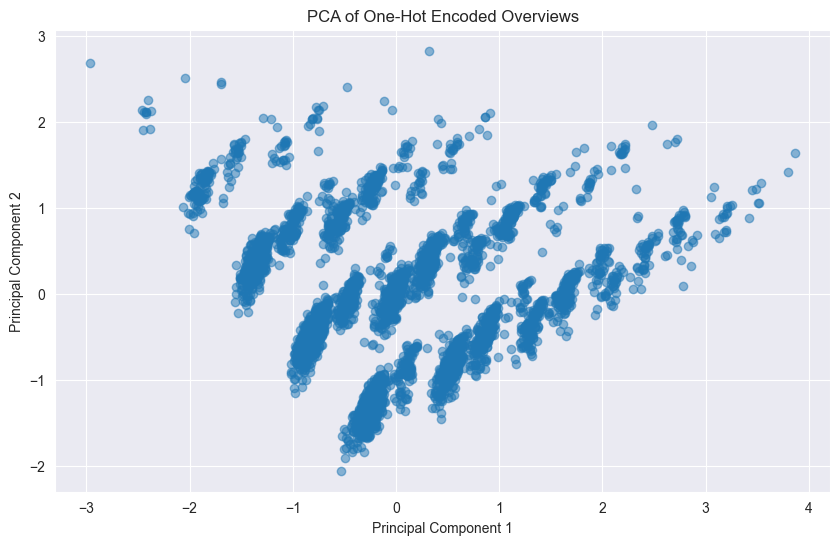

In [21]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Set the desired number of components
overview_pca = pca.fit_transform(df['one_hot_overview'].tolist())

# Extract PCA components
pc1 = overview_pca[:, 0]
pc2 = overview_pca[:, 1]

# Plot the PCA components as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.title('PCA of One-Hot Encoded Overviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# we did exactly this in the lecture notebook

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

We see what seems like a collection of 5 linear dependencies: 5 different intercepts for the PC2 = a + bPC1 + e regression. this suggests there might be 5 different clusters with their own means

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [22]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio for each component
print("Explained variance ratio for each component:", explained_variance_ratio)

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

# Print cumulative explained variance ratio
print("Cumulative explained variance ratio:", cumulative_explained_variance_ratio)

# Calculate variance information lost
variance_lost = 1 - cumulative_explained_variance_ratio[-1]

# Print variance information lost
print("Variance information lost in 2D PCA projection:", variance_lost)

Explained variance ratio for each component: [0.0699188  0.04296571]
Cumulative explained variance ratio: [0.0699188  0.11288451]
Variance information lost in 2D PCA projection: 0.8871154913246893


*See output of added code block.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

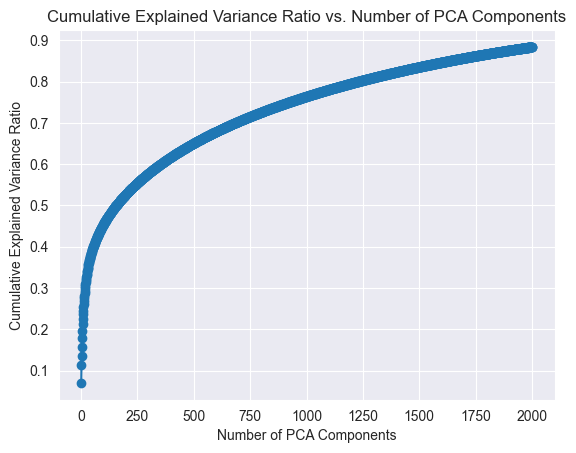

In [50]:
pca = PCA(n_components=2000)  # Set the desired number of components
overview_pca = pca.fit_transform(df['one_hot_overview'].tolist())
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')

# Set up labels and title
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of PCA Components')

# Show plot
plt.grid(True)
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [51]:
# your code answer here
num_components_80_percent_variance =1
for i, cumulative_variance in enumerate(cumulative_explained_variance_ratio):
    if cumulative_variance >= 0.8:
        num_components_80_percent_variance = i + 1
        break

print("Number of principal components needed to explain 80% of the total variance:", num_components_80_percent_variance)

Number of principal components needed to explain 80% of the total variance: 1227


*Your text answer here*

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [52]:
n_dims = 1227
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(df['one_hot_overview'].tolist())
df["overview_pca"] = labels_pca.tolist()
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275116166, 1.2545637565427674, 1.06...",2,2
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.378072930058912, -1.5934718497724252, 0.93...",13,13
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.912881049062202, 1.1768562611981288, 0.806...",4,4
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8229543741730555, -0.4484862837347775, 0.59...",10,10
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10117960365987827, -0.22882078000626924, 0...",19,19
...,...,...,...,...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.1645291710186342, -0.35828760782363006, 0....",6,6
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.439616851207752, -1.1329578847993336, 0.369...",15,15
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.39072083347918657, 0.5742052146661918, -0.2...",15,15
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3015446623294267, -1.1754163046969563, 0.7...",6,6


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [59]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)

# Reshape overview_pca data to 2D array
overview_pca_2d = df['overview_pca'].tolist()

# Fit the KMeans model
kmeans.fit(overview_pca_2d)

# Get cluster predictions
y_preds = kmeans.predict(overview_pca_2d)

# Add predicted cluster into the dataframe as a new column
df["cluster_kmeans"] = y_preds

# Print out elements of cluster 0
cluster_0 = df[df["cluster_kmeans"] == 0]
print(cluster_0)

                     title                                           overview  \
23      The Golden Compass  After overhearing a shocking secret, precociou...   
124                 Frozen  Young princess Anna of Arendelle dreams about ...   
188                   Salt  As a CIA officer, Evelyn Salt swore an oath to...   
226        How Do You Know  After being cut from the USA softball team and...   
239                Gravity  Dr. Ryan Stone, a brilliant medical engineer o...   
...                    ...                                                ...   
4714  Your Sister's Sister  Iris invites her friend Jack to stay at her fa...   
4741       Happy Christmas  After a breakup with her boyfriend, a young wo...   
4745              Absentia  Tricia's husband Daniel has been missing for s...   
4778             Dry Spell  Sasha tries to get her soon-to-be ex husband K...   
4786                 Clean  After losing her husband to a heroin overdose,...   

                           

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

lets take 15, 53, 76

The movies are Narnia, Indiana Jones and GI Joe, these seem to fit together. since they are all action adventure movies. Also, 12 Angry men does not fit, since this is a classical movie about jury-morality.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

There is no clear elbow shape. I would, however, set it somewhere between 8 and 11

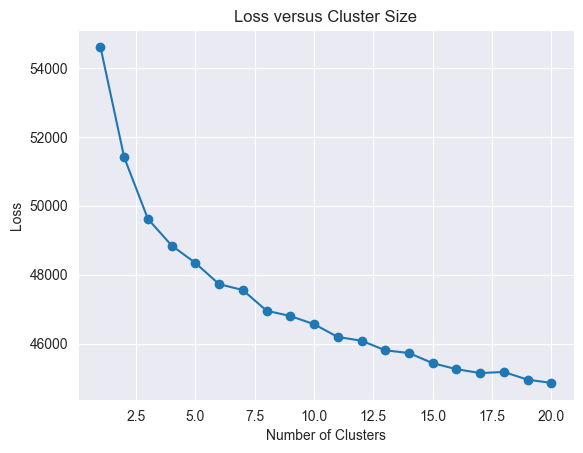

In [56]:
# List to store inertia values
inertia_values = []

# Perform K-means clustering for different cluster sizes
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    overview_pca_2d = df['overview_pca'].tolist()
    kmeans.fit(overview_pca_2d)
    inertia_values.append(kmeans.inertia_)

# Plot loss (inertia) versus cluster size
plt.plot(range(1, 21), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Loss versus Cluster Size')
plt.grid(True)
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [57]:
means = KMeans(n_clusters=20)

# Fit the KMeans model
overview_pca_2d = df['overview_pca'].tolist()
kmeans.fit(overview_pca_2d)

# Get cluster predictions
y_preds = kmeans.predict(overview_pca_2d)

# Add predicted cluster into the dataframe as a new column
df["cluster_gmm"] = y_preds

# Print out elements of a single cluster (e.g., cluster 0) from the dataframe
cluster_0 = df[df["cluster_gmm"] == 0]
print(cluster_0)

                                                  title  \
34                                  Monsters University   
109   The Chronicles of Narnia: The Voyage of the Da...   
134                  Mission: Impossible - Rogue Nation   
202                                               Rio 2   
231                                      Monsters, Inc.   
...                                                 ...   
4636                                               Cube   
4719                                  Facing the Giants   
4730                                        Open Secret   
4756                               The Image Revolution   
4758                                       A True Story   

                                               overview  \
34    A look at the relationship between Mike and Su...   
109   This time around Edmund and Lucy Pevensie, alo...   
134   Ethan and team take on their most impossible m...   
202   It's a jungle out there for Blu, Jewel and the...

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

The cluster does not look good. Monsters University, Narnia and Mission impossible seem like rather different movies.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

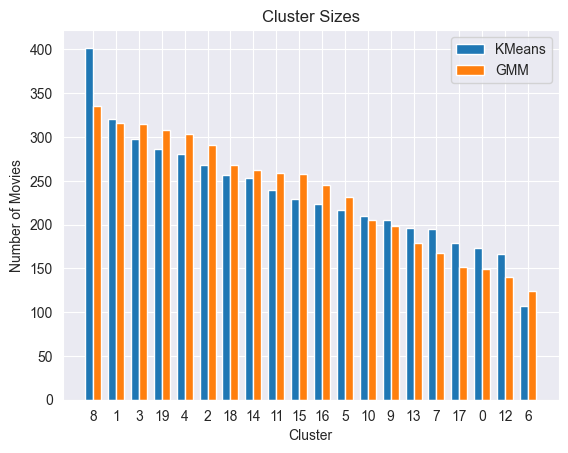

In [62]:
# Create an array for the x-axis positions
# Plotting the bars
# Add labels, title, and legend
cluster_counts = df['cluster_kmeans'].value_counts()
cluster_counts_gmm = df['cluster_gmm'].value_counts()
x = np.arange(len(cluster_counts))
fig, ax = plt.subplots()
width = 0.35

bars1 = ax.bar(x - width/2, cluster_counts.values, width, label='KMeans')
bars2 = ax.bar(x + width/2, cluster_counts_gmm.values, width, label='GMM')

# Add labels, title, and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Movies')
ax.set_title('Cluster Sizes')
ax.set_xticks(x)
ax.set_xticklabels(cluster_counts.index)
ax.legend()

plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

The size of Kmeans is larger in the first and final 7 except the last one. The GMM seems more uniform, this could be because it allows for probabilistic assignments of data points to clusters, accommodating clusters with varying shapes and sizes, while KMeans assumes spherical clusters of equal variance.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [65]:
prev_watch = "Avatar"

# Find what cluster index Avatar falls into for K-means
cluster_kmeans = df.loc[df['title'] == prev_watch, 'cluster_kmeans'].values[0]

# Find what cluster index Avatar falls into for GMM
cluster_gmm = df.loc[df['title'] == prev_watch, 'cluster_gmm'].values[0]

# Print out similar movies based on K-means clustering
print("Similar movies to", prev_watch, " based on K-means clustering:")
similar_movies_kmeans = df[df['cluster_kmeans'] == cluster_kmeans]['title'].values
for movie in similar_movies_kmeans:
    if movie != prev_watch:
        print("-", movie)

# Print out similar movies based on GMM clustering
print("\nSimilar movies to ",prev_watch, " based on GMM clustering:")
similar_movies_gmm = df[df['cluster_gmm'] == cluster_gmm]['title'].values
for movie in similar_movies_gmm:
    if movie != prev_watch:
        print("-", movie)

Similar movies to Avatar  based on K-means clustering:
- Tangled
- Jupiter Ascending
- The Jungle Book
- Shin Godzilla
- Charlie and the Chocolate Factory
- Flushed Away
- Sahara
- Pirates of the Caribbean: The Curse of the Black Pearl
- Star Wars: Episode I - The Phantom Menace
- The Croods
- Real Steel
- Minority Report
- True Lies
- The Taking of Pelham 1 2 3
- Starship Troopers
- Hercules
- Cloudy with a Chance of Meatballs
- Mulan
- Bicentennial Man
- Hotel Transylvania
- Safe House
- Open Season
- Enemy at the Gates
- Battlefield Earth
- Exorcist: The Beginning
- Jarhead
- The Simpsons Movie
- Lady in the Water
- Death Race
- Man on Fire
- The Sentinel
- Mercury Rising
- Supernova
- Resident Evil: Afterlife
- DragonHeart
- The Pacifier
- Chain Reaction
- The Phantom of the Opera
- Blade II
- Mamma Mia!
- Crazy, Stupid, Love.
- Garfield
- The Peacemaker
- Free State of Jones
- Miss Congeniality
- Training Day
- Aliens in the Attic
- All the Pretty Horses
- Sleepers
- Notting Hill


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

The first one is quite bad, as the movies, according to my cinematographic knowledge, seem quite dissimilar. For the GMM clustering it seems slightly better, however, the list contains some strange recommendations. SO I do not think either is particularly good. 
 

**Q6.3** How would you try making the recommender systems better?

A representative frame from the movie could be analysed and compared for simularity with other ones. Also, the age ratings could be added, also the overview length could be varied and adjusted per movie, and the length should subsequently be added as variable: it matters if a movie can ve overviewed in one or ten sentences.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

One could make a "taste profile" and use the Kmeans of the movies in his profile to see which movie could be in the average of its personal set.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [68]:
# Define cosine similarity function
def cosine_sim(v1, v2):
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return np.dot(v1, v2) / (norm_v1 * norm_v2)

# Get overview_pca encoding of previously watched film
prev_watch_enc = df.loc[df['title'] == prev_watch, 'overview_pca'].values[0]

# Calculate cosine similarity between the feature vector of the previously watched film and all other feature vectors
sims = []
for i, row in df.iterrows():
    sim = cosine_sim(prev_watch_enc, row['overview_pca'])
    sims.append(np.abs(sim))  # Make the similarity values absolute

# Add cosine similarity column to the DataFrame
df["cos_sim_to_avatar"] = sims

# Sort DataFrame by cosine similarity
df = df.sort_values(by='cos_sim_to_avatar')

# Print the head of the DataFrame sorted by cosine similarity
print(df.head())

df

                            title  \
2859                     Das Boot   
411   Scott Pilgrim vs. the World   
4017                   Evil Words   
485         Babe: Pig in the City   
4396             Creative Control   

                                               overview  \
2859  A German submarine hunts allied ships during t...   
411   Scott Pilgrim is a film adaptation of the crit...   
4017  One day, for no apparent reason, a cop kills 1...   
485   Babe, fresh from his victory in the sheepherdi...   
4396  Smooth advertising executive David is in a rel...   

                                                 genres proc_genres  \
2859  [{"id": 28, "name": "Action"}, {"id": 18, "nam...       Drama   
411   [{"id": 28, "name": "Action"}, {"id": 12, "nam...   Adventure   
4017  [{"id": 27, "name": "Horror"}, {"id": 9648, "n...    Thriller   
485   [{"id": 12, "name": "Adventure"}, {"id": 35, "...      Family   
4396  [{"id": 18, "name": "Drama"}, {"id": 878, "nam...       Drama

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
2859,Das Boot,A German submarine hunts allied ships during t...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",a german submarine hunts allied ships during t...,35,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06502787274123446, 0.1687479886848253, 0.14...",16,12,0.000011
411,Scott Pilgrim vs. the World,Scott Pilgrim is a film adaptation of the crit...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",scott pilgrim is a film adaptation of the crit...,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6668207855087522, 0.8857554537509151, -0.31...",12,4,0.000020
4017,Evil Words,"One day, for no apparent reason, a cop kills 1...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",one day for no apparent reason a cop kills 11 ...,116,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04744144462326264, 0.14368632320095062, 0.1...",16,12,0.000139
485,Babe: Pig in the City,"Babe, fresh from his victory in the sheepherdi...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Family,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",babe fresh from his victory in the sheepherdin...,36,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4858981701987119, -0.9094847373436145, 0.80...",2,1,0.000183
4396,Creative Control,Smooth advertising executive David is in a rel...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",smooth advertising executive david is in a rel...,51,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.8005990594374454, -0.3129259546547099, -0....",18,13,0.000254
...,...,...,...,...,...,...,...,...,...,...,...,...
415,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the future america is a dystopian wasteland...,87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23152067361940043, 1.4016470372923668, 0.35...",12,5,0.457812
1285,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the nomad is a historical epic set in 18thcent...,39,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.25023301021237593, 1.4192751540292194, 0.33...",12,5,0.469117
3778,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",sam ellis is a man on the rise a hotshot feder...,48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.214975615219796, 1.408547801772845, 0.51474...",16,5,0.471236
3363,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",a warlock flees from the 17th to the 20th cent...,122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14285163674538193, 1.1940360295716, 1.00924...",16,16,0.528300


I dont think this is a particularly good recommendation system, as the movies are all quite different from avatar.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [69]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from time import time

# Preprocessing
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(df_train['overview'].apply(lambda x: ' '.join(x.split()[:10])))
y_train = df_train['genres']
X_test = tfidf_vectorizer.transform(df_test['overview'].apply(lambda x: ' '.join(x.split()[:10])))
y_test = df_test['genres']

# Model Selection and Hyperparameter Tuning
svm = SVC(kernel='linear', C=1.0)
# You can perform hyperparameter tuning here

# Train and Evaluate
start_train = time()
svm.fit(X_train, y_train)
end_train = time()
train_time = end_train - start_train

start_inference = time()
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)
end_inference = time()
inference_time = end_inference - start_inference

# Print Results
print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Training Time (s):", train_time / len(df_train))
print("Mean Inference Time (s):", inference_time / len(df_test))

Train Score: 0.2244355909694555
Test Score: 0.10084925690021232
Mean Training Time (s): 0.0025964439944283738
Mean Inference Time (s): 0.05828112427089877


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

In het selecteren en afstemmen van het model voor het voorspellen van filmgenres op basis van filmoverzichten, begon ik met het voorbewerken van de gegevens door TF-IDF-vectorisatie te gebruiken om de tekst om te zetten in numerieke kenmerken, waarbij ik alleen rekening hield met de eerste 10 woorden van elk overzicht om de computationele complexiteit te beperken.

TF-IDF-vectorisatie meet de relevantie van woorden in een document door hun frequentie te wegen ten opzichte van de frequentie in het gehele corpus, waardoor belangrijke woorden worden benadrukt en minder belangrijke worden afgezwakt. Dit wordt gebruikt om unieke en informatieve kenmerken te identificeren voor tekstanalyse en classificatie. (https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
 
Voor de modelselectie koos ik voor een Support Vector Machine (SVM) met een lineaire kernel vanwege zijn effectiviteit in het omgaan met hoog-dimensionale gegevens en potentiële non-lineaire relaties. Hyperparameterafstemming werd handmatig uitgevoerd door de regularisatieparameter C aan te passen. Het trainings- en evaluatieproces verliep eenvoudig, waarbij ik het SVM-model trainde op de trainingsgegevens en de prestaties ervan op de testgegevens evalueerde met behulp van nauwkeurigheid als de evaluatiemeting.

De verkregen resultaten tonen een trainingscore van ongeveer 22,4% en een testscore van ongeveer 10,1%. De gemiddelde trainingstijd per monster is ongeveer 0,0026 seconden, terwijl de gemiddelde inferentietijd per monster ongeveer 0,058 seconden is. Hoewel het model beter presteert dan willekeurig raden, is er nog steeds aanzienlijke ruimte voor verbetering. Toekomstige iteraties van het model zouden alternatieve kenmerkrepresentaties kunnen verkennen, zoals woordembeddings of kenmerken op karakterniveau, experimenteren met verschillende machine learning-algoritmen of zelfs dieper ingaan op complexere modellen zoals neurale netwerken. Daarnaast zou het uitvoeren van een uitgebreider hyperparameteronderzoek met behulp van technieken zoals grid-zoeken of random zoeken kunnen helpen bij het optimaliseren van de prestaties van het model. Visualisaties zoals leerkrommen of verwarringsmatrices zouden dieper inzicht kunnen bieden in het gedrag van het model en kunnen helpen bij het identificeren van verbeterpunten.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)